# RQ4
###### What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof as get


In [5]:
M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv", encoding = 'latin-1', usecols=['payment_type', 'PULocationID'])
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-02.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-03.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-04.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-05.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-06.csv", encoding = 'latin-1')

In [6]:
M1.head()

,PULocationID,payment_type
0,41,2
1,239,2
2,262,1
3,140,2
4,246,1


###### FROM THE LEGEND OF THE COLUMN WE KNOW WHAT EACH NUMBER MEANS:

A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

The pickup boroughs are taken into consideration.
To answer this question, we need two columns: payment_type, PULocationID.



In [232]:
#dropping vs keeping the ones I need?
#df.drop(columns=['', 'C'])
M2 = M1.filter(['payment_type', 'PULocationID'])
#free the memory from this big object M1 is! 
del M1

In [233]:
M2.head()

,payment_type,PULocationID
0,2,41
1,2,239
2,1,262
3,2,140
4,1,246


In [234]:
borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", encoding = 'latin-1')

In [235]:
#the key column is LocationID in boroughs and (PULocationID or DOLocationID) in M3. They contain the same data: LocationIDs. 
#How to merge these two dataframes when two columns' keys are not in the same order?

result = pd.merge(M2,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()


,payment_type,PULocationID,LocationID,Borough
0,2,41,41,Manhattan
1,2,41,41,Manhattan
2,2,41,41,Manhattan
3,1,41,41,Manhattan
4,1,41,41,Manhattan


In [236]:
#now we can discard IDs to have the df that we want to work with
M3 = result.drop(['LocationID','PULocationID'],1)
M3.head()

,payment_type,Borough
0,2,Manhattan
1,2,Manhattan
2,2,Manhattan
3,1,Manhattan
4,1,Manhattan


Now that we have our df, we start to look at it.


In [237]:
M3.describe(include='all')

,payment_type,Borough
count,8.759874e+06,8759874
unique,NaN,7
top,NaN,Manhattan
freq,NaN,7965703
mean,1.310611e+00,NaN
std,4.817818e-01,NaN
min,1.000000e+00,NaN
25%,1.000000e+00,NaN
50%,1.000000e+00,NaN
75%,2.000000e+00,NaN


As we see, payment type are treated as nummerical data we would like to have that as a cathegory.

In [238]:
columns=[]
index= [0,1,2,3,4,5]
typeofpay=pd.DataFrame(index=index, columns=columns)


In [239]:
ID=list(range(1,7))
ID

[1, 2, 3, 4, 5, 6]

In [240]:
typeofpay['ID']=ID
typeofpay['wayofpay']=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip']
typeofpay

,ID,wayofpay
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute
4,5,Unknown
5,6,Voided trip


Now we have a df to merge with our data

In [241]:
M4 = pd.merge(M3,
              typeofpay,
              left_on='payment_type',
              right_on='ID',
              how='inner')
M5=M4.drop(['payment_type'], 1)
M5.head()

,Borough,ID,wayofpay
0,Manhattan,2,Cash
1,Manhattan,2,Cash
2,Manhattan,2,Cash
3,Manhattan,2,Cash
4,Manhattan,2,Cash


Now we can rerun describe to extract some info.

In [242]:
M5.wayofpay.describe()

count         8759874
unique              4
top       Credit card
freq          6105871
Name: wayofpay, dtype: object

In [243]:
M5.wayofpay.unique()

array(['Cash', 'Credit card', 'No charge', 'Dispute'], dtype=object)

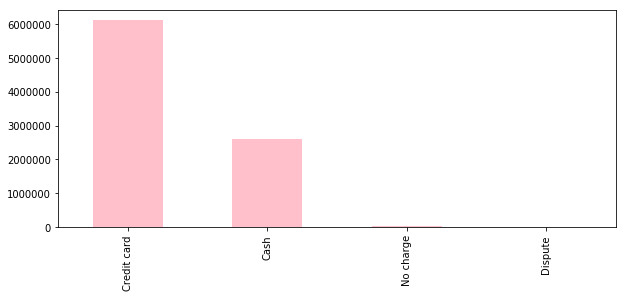

In [244]:
M5['wayofpay'].value_counts().plot(kind='bar', figsize=(10,4), color='pink')

Now we know something more: Credit card is by far (more than 60% of the payments) the most common way to pay. Almost the totality of the other fairs is payed in cash.
Our dataframe has only four unique value: Unknown and voided trip are missing.

Borough
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
EWR              AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Unknown          AxesSubplot(0.125,0.125;0.775x0.755)
Name: ID, dtype: object

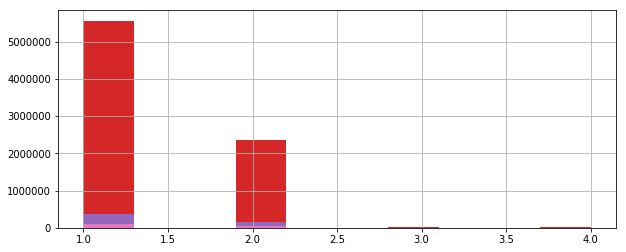

In [245]:
M5.groupby('Borough')['ID'].hist(figsize=(10,4))

From this quick graphical analisys we can't see any correlation between borough and way of payments. 
We have to run a chi-squared test to be sure.

We create a dataframe with wayofpay as raws and Boroughs as columns.

In [246]:
columns=['Bronx', 'Brooklyn', 'Manhattan', 'Queens'] #excluding EWR, uknonwn and Staten Island for scarsity of statistical relevance
index= ['Cash', 'Credit card', 'No charge', 'Dispute','Total']
tab=pd.DataFrame(index=index, columns=columns)

In [247]:
for i in columns:
    k= pd.DataFrame(M5[M5['Borough'] == i]).groupby('wayofpay')
    s= k['Borough'].count()
    s= list(s)
    s.append(sum(s))
    tab[i]=s

In [248]:
tab

,Bronx,Brooklyn,Manhattan,Queens
Cash,4114,35339,2356898,154704
Credit card,2939,63280,5564803,365207
No charge,65,311,9762,1298
Dispute,271,1320,34240,5697
Total,7389,100250,7965703,526906


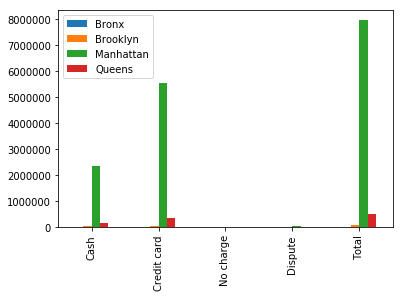

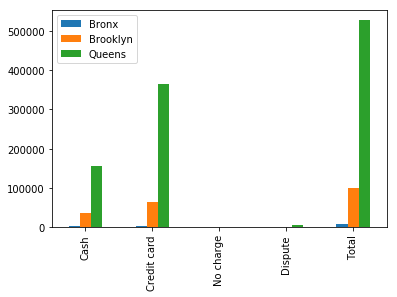

In [249]:
tab.plot(kind='bar')
tab2=tab.drop(['Manhattan'], 1)
tab2.plot(kind= 'bar')

In [250]:
tab

,Bronx,Brooklyn,Manhattan,Queens
Cash,4114,35339,2356898,154704
Credit card,2939,63280,5564803,365207
No charge,65,311,9762,1298
Dispute,271,1320,34240,5697
Total,7389,100250,7965703,526906


In [251]:
tot=[]
for i in range (5):
    som=tab.Bronx[i]+tab.Brooklyn[i]+tab.Manhattan[i]+tab.Queens[i]
    tot.append(som)
tot

[2551055, 5996229, 11436, 41528, 8600248]

In [252]:
tab['Total']=tot
observed= tab.iloc[0:4,0:4]   # Get table without totals for later use


In [253]:
tab

,Bronx,Brooklyn,Manhattan,Queens,Total
Cash,4114,35339,2356898,154704,2551055
Credit card,2939,63280,5564803,365207,5996229
No charge,65,311,9762,1298,11436
Dispute,271,1320,34240,5697,41528
Total,7389,100250,7965703,526906,8600248


In [254]:
observed

,Bronx,Brooklyn,Manhattan,Queens
Cash,4114,35339,2356898,154704
Credit card,2939,63280,5564803,365207
No charge,65,311,9762,1298
Dispute,271,1320,34240,5697


Now that we have our data frame, we can perform our chi-squared test 

H0: Colour preference is not associated with personality, and

H1: Colour preference is associated with personality

First thing we calculate the df of expected values


In [255]:

expected =  np.outer(tab["Total"][0:4],
                     tab.loc["Total"][0:4]) / 8600248

expected = pd.DataFrame(expected)

expected.columns = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens']
expected.index = ['Cash', 'Credit card', 'No charge', 'Dispute']

expected

,Bronx,Brooklyn,Manhattan,Queens
Cash,2191.767655,29736.731284,2.362833e+06,156293.886622
Credit card,5151.727727,69895.886404,5.553814e+06,367367.201210
No charge,9.825368,133.305342,1.059223e+04,700.642239
Dispute,35.679249,484.076971,3.846397e+04,2544.269929


In [256]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

#We call .sum() twice:once to get the column sums and a second time to add the column sums together,
#returning the sum of the entire 2D table.
print(chi_squared_stat)

12870.606976136387


In [257]:

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 9)   # Degrees of fredom for a test of independence equals the product of the number of categories
                                # in each variable minus 1. In this case we have a 4x4 table so df = 3x3 = 9.


print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=9)
print("P value")
print(p_value)

Critical value
16.918977604620448
P value
0.0


We could use scipy to conduct a test of independence quickly. Use stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts:

In [258]:
stats.chi2_contingency(observed= observed)

(12870.606976136387,
 0.0,
 9,
 array([[2.19176766e+03, 2.97367313e+04, 2.36283261e+06, 1.56293887e+05],
        [5.15172773e+03, 6.98958864e+04, 5.55381418e+06, 3.67367201e+05],
        [9.82536829e+00, 1.33305342e+02, 1.05922271e+04, 7.00642239e+02],
        [3.56792492e+01, 4.84076971e+02, 3.84639739e+04, 2.54426993e+03]]))

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

## RESULTS

The chi-squared test statistic is 12870.6 (very far away from the critical value of 16) with an associated p < 0.001.
(.000 should not be interpreted as exactly zero, as in the computer print-out.)

The null hypothesis is rejected, since p < 0.001, and a conclusion is made that way of payment is associated with borough. Examining the pattern of numbers it is noted that in Brooklyn, Bronx and Queens there are a lot more of dispute than as we would expect.
We can also denote that in Bronx and in Brooklyn, in respect to other boroughs, there is a preference for cash over credit cards. In manatthan, viceversa, there is a preference for credit cards in respect to cash money.

###### RUN SAME ANALYSIS FOR EACH MONTH IN ORDER TO CONFIRM OUR RESULTS
We can now run same analysis for each month.


In [259]:
chisq=stats.chi2_contingency(observed= observed)

In [260]:
chisq=list(chisq)
chisq[0:2]

[12870.606976136387, 0.0]

In [261]:
columns=[]
index= ['chisq', 'p_value']
#df=pd.DataFrame(index=index, columns=columns) #we run this line only the first time in order to not to overwrite the data frame

In [262]:
#changing only the data.csv and this line we can repeat our analisy for each month and store the value in our dataframe

df['Jan']=chisq[0:2]
#df['Feb']=chisq[0:2]
#df['Mar']=chisq[0:2]
#df['Apr']=chisq[0:2]
#df['May']=chisq[0:2]
#df['Jun']=chisq[0:2]

In [263]:
df

,Jan,Feb,Mar,Apr,May,Jun
chisq,12870.606976,11180.856199,11358.214749,9753.274561,8851.041357,8653.506051
p_value,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


As we can se from our last data frame. Our precedent hypotesis are validated analizing other months.